In [1]:
import tensorflow as tf
import tensorflow.keras
#from tensorflow.keras.utils import to_categorical

In [2]:
tf.__version__

'2.17.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113 )

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(404, 13)

In [5]:
from tensorflow.keras.models import Sequential  # Sequential class
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

In [6]:
from keras import backend as K
K.clear_session()

model = Sequential()  # create an instance of the Sequential class

model.add(Dense(256, input_shape=(x_train.shape[1], ), activation='tanh', kernel_regularizer="l1"))
# model.add(Dropout(0.1))

model.add(Dense(128, activation='tanh', kernel_regularizer="l1"))
# model.add(Dropout(0.1))

model.add(Dense(64, activation='tanh', kernel_regularizer="l1"))

# This is my output layer
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.004)
model.compile(optimizer=adam, metrics=["mean_squared_error"])

In [9]:
history = model.fit(x_train, y_train, epochs=50, batch_size=25, validation_split= 0.1, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['bias', 'bias', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 28.7569 - mean_squared_error: 604.3205 - val_loss: 24.1167 - val_mean_squared_error: 500.8292
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.7208 - mean_squared_error: 628.6497 - val_loss: 18.6285 - val_mean_squared_error: 498.4639
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4093 - mean_squared_error: 654.4016 - val_loss: 13.8602 - val_mean_squared_error: 492.8993
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8182 - mean_squared_error: 572.5511 - val_loss: 9.8166 - val_mean_squared_error: 486.3929
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9527 - mean_squared_error: 577.9008 - val_loss: 6.5085 - val_mean_squared_error: 496.0280
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8294 - mean_squared_error: 576.0670 - val_loss: 3.9468 - val_mean_squared_error: 502.9235
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4510 - mean_squared_error: 608.3897 -

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0563 - mean_squared_error: 586.1717 


(0.05632584169507027, 615.8577880859375)

In [11]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

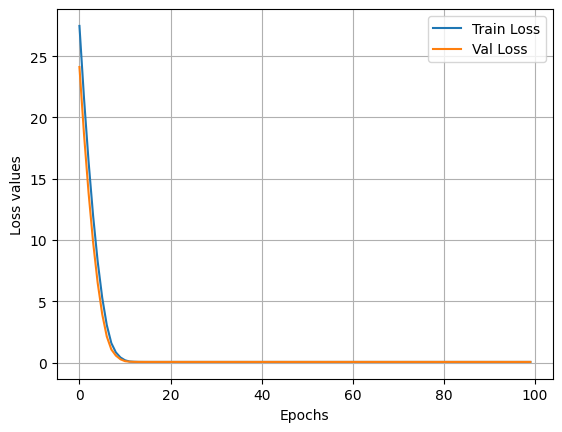

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.legend()
plt.grid("on")
plt.show()